In [1]:
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import keras
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.utils import to_categorical
import math
import datetime
import time
from tensorflow.keras import applications

In [2]:
img_width, img_height = 224, 224
# top_model_weights_path = r"D:\Dataset\bottleneck_fc_model.h5"
train_data_dir = r"/content/drive/MyDrive/Dataset/train"
test_data_dir = r"/content/drive/MyDrive/Dataset/test"
epochs = 7
batch_size = 50


In [3]:
vgg16 = applications.VGG16(include_top=False, weights="imagenet")
datagen = ImageDataGenerator(rescale=1. / 255)

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
start = datetime.datetime.now()

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save("bottleneck_features_train.npy", bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

FileNotFoundError: ignored

In [5]:
#training data
generator_top = datagen.flow_from_directory(
   train_data_dir,
   target_size=(img_width, img_height),
   batch_size=batch_size,
   class_mode="categorical",
   shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

train_data = np.load("bottleneck_features_train.npy")

train_labels = generator_top.classes

train_labels = to_categorical(train_labels, num_classes=num_classes)

FileNotFoundError: ignored

In [6]:
#validataion data
generator_top = datagen.flow_from_directory(
   train_data_dir,
   target_size=(img_width, img_height),
   batch_size=batch_size,
   class_mode="categorical",
   shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

validation_data = np.load("bottleneck_features_train.npy")

validation_labels = generator_top.classes

validation_labels = to_categorical(validation_labels, num_classes=num_classes)

FileNotFoundError: ignored

In [7]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy",
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=["acc"])
history = model.fit(train_data, train_labels,
   epochs=7,
   batch_size=batch_size,
   validation_data=(validation_data, validation_labels))
(eval_loss, eval_accuracy) = model.evaluate(validation_data, validation_labels, batch_size=batch_size,verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1/1 [==============================] - 0s 45ms/step
Label: Blue Tarantula ----> 99.56 %
Label: Ladybird Mimic Spider ----> 0.35 %
Label: Peacock Spider ----> 0.09 %
Result:
Label:  Blue Tarantula


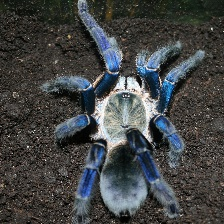

In [ ]:
model= keras.models.load_model(r"/content/drive/MyDrive/Dataset/data.h5")
def read_image(file_path):
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image
def Spider_test(path):
    spiders = ["Blue Tarantula","Ladybird Mimic Spider","Peacock Spider"]
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)
    preds = model.predict(bt_prediction)
    for idx, spider, x in zip(range(0,6), spiders , preds[0]):
        print("Label:", spider,"---->",round(x*100,2),"%")
    print("Result:")
    class_predicted = np.argmax(preds,axis=1)
    class_dictionary = generator_top.class_indices
    inv_map = {v: k for k, v in class_dictionary.items()}
    print("Label: ",  inv_map[class_predicted[0]])
    return load_img(path)
Spider_test(r"/content/drive/MyDrive/Dataset/test/Blue Tarantula/1.jpg")